## 개요 

참여중인 딥러닝 스터디 1주차 기록입니다.

## Tensorflow, Pytorch

* 프레임워크 2가지 존재 : Tensorflow(텐서플로우, 구글), Pytorch(파이토치, 페이스북)
  * 알파고(딥마인드)시점까지는 ai의 90퍼센트 이상은 텐서플로우로 구현되었으나, 후발주자로 페이스북이 파이토치를 만들고 경쟁구도가 되었음

* 파이토치 vs 텐서플로우
  * 파이토치 : high레벨에 가까운 pythonic함 (사람의 직관에 가까운, 추상화된)
              대학원 등 교육 쪽에서 많이 사용(구현해보는 것에 중점)
              사용자 증가로 긍정적 생태계 조성(텐서플로우에는 없는 함수가 개발될 수 있고, 디버깅 쉬워짐[참고Case많음], 참고강의 많음)
  * 텐서플로우 : low레벨에 가까운 효율성 (기계가 이해하기 쉬운 C언어와 같은)
                산업 등 비즈니스 영역에서 많이 사용(효율성 중시)

## Tensor
* Tensor : ai에서 사용하는 배열 (차원=rank), 고차원의 데이터 저장(숫자뿐 아니라 문자도 가능)
  * 0차원 scalar / 1차원 vector / 2차원 matric (2d tensor) /3차원 3 tensor (3d tendor) / N차원 N tensor
  * 참고영상 : https://youtu.be/m0qwxNA7IzI?si=FeyWcPYuun7T_QON
  
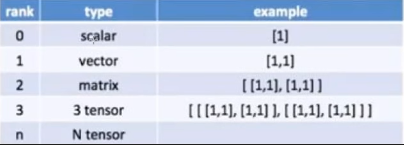

* 고차원/비정형 데이터 필요성 예시
  * 이미지 데이터(흑백)는 3d tensor 필요
  * 이미지 데이터(컬러)는 4d tensor 필요
  * 영상 데이터는 5d tensor 필요
  * (결론→) 비정형데이터의 처리에 있어 tensor가 필요

* 기존에는 매출, 성장률 등 숫자(정형 데이터)만 썼다면, 이제는 이미지(비정형 데이터) 등도 데이터 분석에 사용하기 시작함

# Variable

* 연산 등은 data type을 일치시켜야 정상적으로 가능

* Variable 타입 (float32/64 , int8/16/32/64)
  * 컴퓨터는 수를 2진수로 표현하며, float데이터의 경우는  경우 오차가 발생하고, 이를 사용한 계산이 많아수록 오차가 커짐
  * float64가 언제나 좋은 것은 아님(메모리 사용량[비용], 연산속도의 문제)
  * **딥러닝에서는 주로 32bit를 주로 사용**(숫자 하나하나에 큰 의미가 있지 않음, 중요한 것은 숫자 사이의 관계)
    * 딥러닝은 엄청 많은 계산을 해야하기 때문에, 비용적으로 저렴한 32bit 사용
    > [컴퓨터에서 계산을 담당하게 되는 부품은 CPU, GPU] <br>
    CPU 어려운 계산을 조금 가능 / GPU 쉬운 계산을 많이 가능<br>
    (교수와 초등학생에 비유 가능 → 1개의 미적분이라면 CPU, 1만개의 사칙연산은 GPU)<br>
     → 그렇기 때문에 GPU를 많이 사용함<br>
     (많이 쓰이는 그래픽카드는 한개당 3천만원, 구글 프로젝트는 1만개씩 사용 1~6개월정도 사용)  

## Tensorflow 실습 (constant, rank)
* 텐서플로우 2.0의 차이 > 즉시 실행모드(Eager Mode)지원<br>
(1.x버전에서는 그래프를 생성하고 초기화하는 등 별도 작업이 필요했었음)<br>
<br>

* Rank(축) : 차원의 수 
* Shape(형상) : 0, 1, 2차원 등 데이터의 차원
* dtype :  `string`, `float32`, `float16`, `int32`, `int8` 등 데이터 타입

In [ ]:
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.16.1


In [ ]:
a = tf.constant(2)
b  = tf.constant([2,3])
c = tf.constant([[2,3],[6,7]])
d = tf.constant(['hello'])

print('[tf.rank 차원의 수 출력]')
print(tf.rank(a))
print(tf.rank(b))
print(tf.rank(c))
print(tf.rank(d))
print()

print('[변수 자체 출력]')
print(a)
print(b)
print(c)
print(d)

[tf.rank 차원의 수 출력]
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)

[변수 자체 출력]
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)
tf.Tensor([b'hello'], shape=(1,), dtype=string)


# 난수생성
* tf.random.uniform (균등분포 uniform distribution)
* tf.random.normal (정규분포 normal distribution)
  * 모든 분포 중 가장 중요한 분포, 분포 상 가운데 부분 데이터를 많이 가져오게 됨
  (정규분포는 평균과 sd만 있으면 그릴 수 있다)

In [ ]:
rand1 = tf.random.uniform(shape=[1], minval=0, maxval=1)
print(rand1.shape)
print(rand1)

(1,)
tf.Tensor([0.8562789], shape=(1,), dtype=float32)


In [ ]:
rand2 = tf.random.normal(shape=[1,2], mean=0, stddev=1)
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)

print(rand2.shape)
print(rand2)
print()
print(rand3.shape)
print(rand3)

(1, 2)
tf.Tensor([[-0.8665893   0.65539646]], shape=(1, 2), dtype=float32)

(3, 2)
tf.Tensor(
[[ 0.2873476   0.08000568]
 [ 0.23599206  0.11011286]
 [-3.2414987   0.7665266 ]], shape=(3, 2), dtype=float32)


## 계산 (add, subtract, multiply)
  * add, subtract, multiply (`+`, `-`, `*` 기호로도 가능)

In [ ]:
a = tf.constant(3)
b = tf.constant(2)

In [ ]:
print(tf.add(a,b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print(tf.multiply(a,b))
print(a*b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


## numpy와 tensor의 변환

* 둘 다 데이터를 담는 container
* 학습이 잘되고 있는지, 중간결과 등을 확인할때 numpy형태로 cpu로 확인
* 실제 계산은 tensor 형태로 gpu에서 수행

In [ ]:
# numpy()
c = (a+b)

print(c)
print(type(c))

print()
print(c.numpy())
print(type(c.numpy()))

tf.Tensor(5, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>

5
<class 'numpy.int32'>


In [ ]:
# tf.convet_to_tensor()
c_sqrt = np.sqrt(c,dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_sqrt)

print(c_sqrt)
print(type(c_sqrt))

print()
print(tf.convert_to_tensor(c_sqrt))
print(type(tf.convert_to_tensor(c_sqrt)))

2.236068
<class 'numpy.float32'>

tf.Tensor(2.236068, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


# broadcasting
* tensor의 형태가 다르지만 broadcasting으로 빈 부분을 채워 계산

In [ ]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

# 행렬 곱셈(matrix multiplication)
* 딥러닝 공부 전 어떻게 하는 것인지 알아두면 좋음

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

# 타입변환
* 기본 dtype : `float32`, `int32`
* 연산시 tensor의 타입을 맞춰야 함
* 타입 변환에는 `tf.cast()` 사용<br>
<br>

* 타입이 달라 연산이 안되는 오류는 텐서플로우를 사용하며 많이 발생, 데이터타입을 지정하며 쓰는 것을 권장
> 추가지식 <br>
`2.` 과 같이 0을 생략해도 float로 간주
파이썬은 인간처럼 데이터형이 달라도 계산하지만(2+2.0), 다른 언어는 오류 발생



In [ ]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
# 일부러 오류나게 한 코드
a+b

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2] name: 

In [ ]:
a+tf.cast(b, tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()` <br>

In [ ]:
@tf.function
def my_function(x):
  return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

print(tf.autograph.to_code(my_function.python_function))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)
def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) ** 2 - 10 * ag__.ld(x) + 3
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



* 텐서플로우는 계산 그래프 미리 고정 시켜 계산 등을 빠르게 하여 비용 등을 절감할 수 있다
(파이토치는 그래프고정기능 자체가 없어서 속도를 빠르게 할 수 없다)

In [ ]:
import timeit

class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
    self.dense_1 = tf.keras.layers.Dense(128, activation = 'relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self,x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60,28,28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print(f"Eager time: {timeit.timeit(lambda: eager_model(input_data), number = 10000)}")
print(f"Graph time: {timeit.timeit(lambda: graph_model(input_data), number = 10000)}")

c:\Users\kibok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Eager time: 18.815009500001906
Graph time: 4.405216699997254


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
X = tf.Variable(20.)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

* 텐서플로우의 꽃
* ai가 많이 한다는 단순계산은 미분이며 이를 많이 하므로 자동미분은 도움이 됨 <br>
  cpu에서 gpu로 넘기는 것은 c++수준의 코드를 짜야하고 넘겨야하는 번거로움이 있는데, 이를 자동으로 해줘서 편함

In [ ]:
x = tf.Variable(3.)
with tf.GradientTape() as tape: #with 아래 값들은 미분값 추정을 하겠다는 선언 (tape : 기록)
  y = x**2

In [ ]:
print(type(x))
print(type(y))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
dy_dx = tape.gradient(y,x)
dy_dx.numpy()

6.0

In [ ]:
# tape내에 선언하지 않은 x2로 인해 에러 발생 (일부러 에러낸 코드)
# 모든 수식을 gradient(추적)하는 것은 비용이 많이 드므로 필요한 것만 with로 선언
x2 = tf.Variable(4)
dy_dx = tape.gradient(y,x2)
dy_dx.numpy()

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

* 이미지 처리 CNN, 시계열 처리 RNN 등 배울 예정


## Linear regression
* 추세선 등을 그어서 쉽게 판단 가능 +  X(투입)에 대한 Y(산출)을 판단해 데이터에 기반한 정량적 판단(객관적 증거)
* 선형적관계
  > $Y = f(X) + \epsilon$ 을 기본적인 ML/DL의 식이라고 할 때, <br>
  $f$의 관계가 선형적 관계가 있다고 가정할 때 Linear regression <br>
  $income = f(education, seniority) + \epsilon$ 와 같은 예시를 들 수 있음
* Single/Multi regression이 있다

>[용어정리]  
response, target : Y값<br>
feature, input, predictor : X값<br>
$\epsilon$(엡실론) : 오차<br>
$\hat{x}$ : 예측값 $x$ (위의 기호는 hat)

* 비선형적 관계를 다루는 모델을 사용하여 오차를 줄일 수 있음<br>
  **단 오차를 0으로 만드는게 무조건 좋은 것은 아님** → 다뤄보지 못한 데이터가 나오면 **성능이 떨어짐(과적합 overfitting)**

## interpretability vs flexibility
  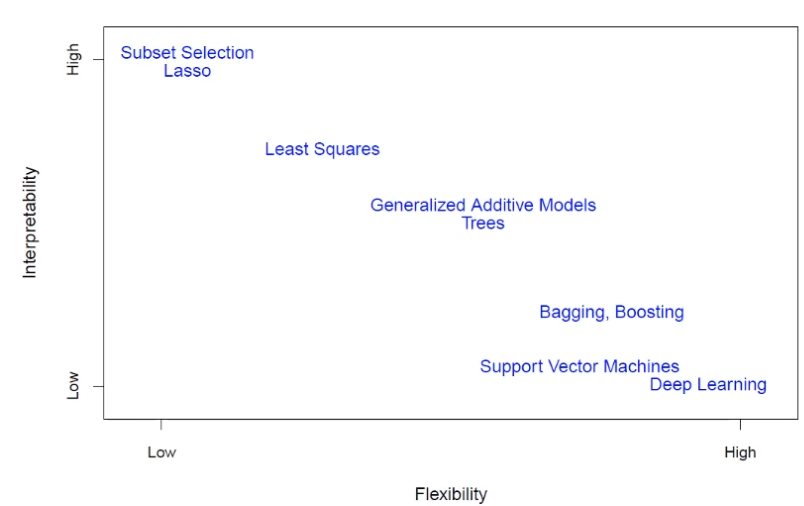
>[용어정리]  
flexibility : 성능, performance (100문제중 80문제를 찾추는가)<br>
interpretability : 해석<br>
Least Squares : Linear regression

* Deep learning : 높은 성능 / 낮은 해석능력 <br>
                  효과적이고 빠름, 비선형적이면 좋은 모델을 뽑을 수 없음(선형이라는 가정 자체가 틀린 시작)
* Least Squares : 성능은 DL보다 낮지만 높은 해석능력 (전통적 통계학의 기반을 둔 머신러닝, Statistical ML)<br>
                  많은 시간과 데이터 필요, 비선형적 관계를 잘 모델링
* 성능이 좋으니 DL만 사용?
  > 관련 사례<br>
  DL로 판단하여 대출거절한 것은 차별에 해당한다는 판례<br>
  대출거절에 대해 근거를 제시해야하지만(자산부족 등), DL은 해석능력(interpretability)이 낮아 설명할 근거가 부족함<br>
  Least Squares(ㅣinear regression)로 근거를 제시했다면 차별이 되지 않았을 것<br>

## assessing model accuracy
* error의 정의 : 예측값과 실제값의 차이
  * 평균에 제곱한 에러 총합 MSE(Mean Squared Error), 줄일수록 좋음
    * 제곱을 활용하는 이유 : 나중에 미분(에러가 최소화되는 지점찾기)를 하는데, 이를 위해서 함 (다음 강의에서 설명예정)
    * $MSE_{TR}$(Training set), $MSE_{TE}$(Test set)
  * 데이터 특성(복잡/단순)과 모델 적용(복잡/단순)에 따른 Training, Test MSE추이
    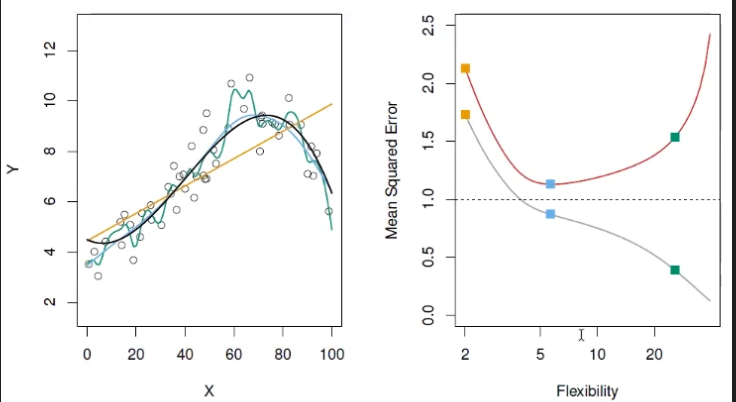
    * 검정(정답), 노랑(Linear), 초록(Smoothing splines)/ 빨강($MSE_{TR}$), 회색($MSE_{TE}$)
    * **단순한 데이터에 복잡한 모델(초록)을 사용하니 과적합** 발생<br>
    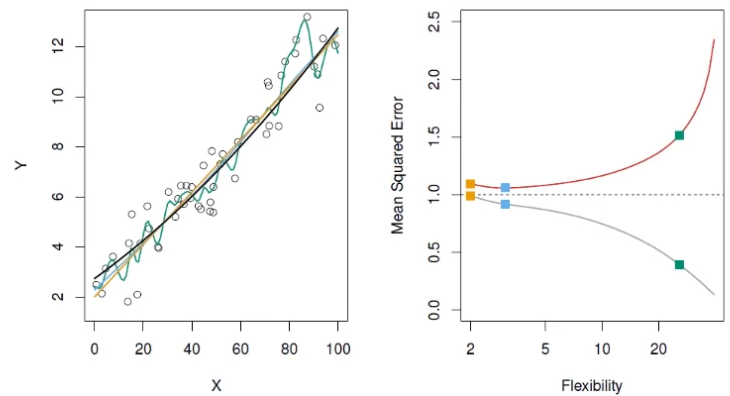
    * **데이터가 복잡하지 않아 Linear를 사용하니 Error추이(우측그래프)도 좋음**
  

## Bias vs Variance 의 Trade off
* error는 Variance와 Bias로 이루어져 있다
> Variance(V), Bias(B) 예시 (과녁)
  V 낮음 B 낮음 : 정중앙에 잘 모여있음
  V 낮음 B 높음 : 잘 모여있지만 위치가 잘못됨
  V 높음 B 낮음 : 정답 근처이지만 불안정하게 퍼져있음
  V 높음 V 높음 : 정답 근처도 아니고, 불안정하게 퍼져있음

* Bias낮음 : Training에서 적중률이 높다, Overfitting
             **정답 자체를 틀리는 것**과 관계
* Variance높음 : 모델이 불안정하다
                 **변동에 과민하게 반응하는 것**과 관계 (결과의 극단적 변화, 무의미한 결과는 무의미한 것으로 간주해야 안정적인 모델)

* 둘 다 낮추기는 힘듦 (B낮추려면 V높아짐, B낮추려면 V 높아짐)
* 둘 다 낮추기 위한 단 하나의 방법 : 데이터를 추가한다

* Bias와 Variance를 고려한 가장 error가 적은 부분 Sweet spot <br>
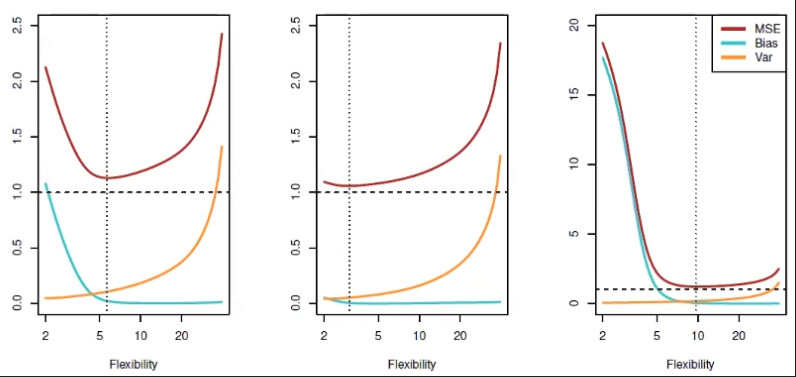